In [1]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.2/152.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 18.4 MB/s eta 0:00:00


In [2]:
!pip install langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 4.4 MB/s eta 0:00:00


In [3]:
from typing import List,Optional,TypedDict

In [4]:
class AgentState(TypedDict,total=False):
  user_input:str
  task_list:List[str]
  final_output:Optional[str]

In [7]:
from google.colab import userdata
groq_api_key=userdata.get('GROQ_API_KEY')

In [9]:
from langchain_groq import ChatGroq
llm=ChatGroq(groq_api_key=groq_api_key,model_name="llama3-8b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7dcfbf3e3b90>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7dcfbee83f90>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [27]:
def planner_node(state:dict) -> dict:
  prompt=f"Break this task into 2-3 steps: {state['user_input']}"
  response=llm.invoke(prompt)
  steps=response.content
  step_lines=[line.strip("-").strip() for line in steps.split("\n") if line.strip()]
  print("Plannar temp Output:",steps)
  print("Plannar Output:",step_lines)
  return {"task_list":step_lines}

In [29]:
def executor_node(state:dict) ->dict:
  steps=state.get("task_list",[])
  final_output=" -> ".join(steps) + "-> Done!"
  return {"final_output": final_output}

In [30]:
import langgraph.graph

In [31]:
from langgraph.graph import StateGraph

In [32]:
graph=StateGraph(state_schema=AgentState)

In [33]:
graph.add_node("planner",planner_node)
graph.add_node("executor",executor_node)
graph.set_entry_point("planner")
graph.add_edge("planner","executor")
graph.set_finish_point("executor")

In [41]:
graph_compiled=graph.compile()


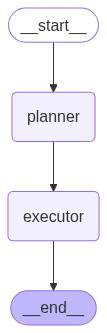

In [35]:
from IPython.display import Image,display
try:
  display(Image(graph_compiled.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [43]:
state={"user_input": "How do crack FAANG or MAANG companies"}
final_state=graph_compiled.invoke(state)

Plannar temp Output: Cracking FAANG or MAANG companies can be a challenging task, but it can be broken down into a few manageable steps. Here's a possible breakdown:

**Step 1: Research and Understanding**

* Research the company's products/services, business model, and industry.
* Understand the company's mission, values, and culture.
* Study the company's financials, including revenue growth, profitability, and cash flow.
* Identify the company's strengths, weaknesses, opportunities, and threats (SWOT analysis).
* Familiarize yourself with the company's leadership team, including their backgrounds and experience.

**Step 2: Skill Development and Preparation**

* Identify the skills and qualifications required for the role you're targeting.
* Develop those skills through online courses, boot camps, or professional certifications.
* Practice coding, problem-solving, and other technical skills relevant to the company.
* Prepare for common interview questions and practice your responses.

In [44]:
print(final_state["final_output"])

Cracking FAANG or MAANG companies can be a challenging task, but it can be broken down into a few manageable steps. Here's a possible breakdown: -> **Step 1: Research and Understanding** -> * Research the company's products/services, business model, and industry. -> * Understand the company's mission, values, and culture. -> * Study the company's financials, including revenue growth, profitability, and cash flow. -> * Identify the company's strengths, weaknesses, opportunities, and threats (SWOT analysis). -> * Familiarize yourself with the company's leadership team, including their backgrounds and experience. -> **Step 2: Skill Development and Preparation** -> * Identify the skills and qualifications required for the role you're targeting. -> * Develop those skills through online courses, boot camps, or professional certifications. -> * Practice coding, problem-solving, and other technical skills relevant to the company. -> * Prepare for common interview questions and practice your re